In [1]:
import numpy as np
import scipy as sc
from scipy.interpolate import spline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, metrics
from sklearn.decomposition import PCA

In [2]:
#Bring our data into handy data frames
X = pd.read_csv("RawData/Final.csv")
gspc = pd.read_csv("^GSPC(1).csv")


In [3]:
#Compute average monthly average S&P for months where we have Goldman reports
spcol = ["0214","0514","0814","1114"]
gspccol = ["2","5","8","11"]
sp = {"0214":0,"0514":0,"0814":0,"1114":0}

for i in range(0,4):# these are the months for which we have data
    val = gspccol[i]
    gspc_by_month = gspc.where(gspc["Date"].str.startswith(val))["Close"]
    iavg =gspc_by_month.mean()
    spmonth = spcol[i]
    sp[spmonth] =  iavg
print(sp) #key values pairs for average closing S&P values for the listed months

X

{'0214': 1843.5800048, '0514': 1889.7671420476195, '0814': 1961.5319068571428, '1114': 2038.0026612000001}


,Unnamed: 0,Company,0214price,0214amt,0514price,0514amt,0814price,0814amt,1114price,1114amt,0214-0514chng,0514-0814chng,0814-1114chng
0,0,1 800 FLOWERS COM,5.409870,48430,5.637158,37785,5.807883,30648,7.210945,20247,-10645,-7137,-10401
1,1,1ST SOURCE CORP,31.928269,60448,32.084393,50336,30.621486,47483,28.484152,38302,-10112,-2853,-9181
2,2,3-D SYS CORP DEL,92.933651,158059,59.149994,1404531,59.799876,2179252,46.370233,1777800,1246472,774721,-401452
3,3,3M CO,140.249912,1904593,135.660022,2373330,143.239747,2803342,141.680126,2126198,468737,430012,-677144
4,4,58 COM INC,38.362069,16240,41.630911,45447,54.059749,1679956,37.249791,2582538,29207,1634509,902582
5,5,8X8 INC NEW,10.130041,21224,10.801852,17497,8.060978,18236,6.662999,16359,-3727,739,-1877
6,6,AAON INC,31.952130,181991,27.877385,114896,33.523768,74216,17.020498,10928,-67095,-40680,-63288
7,7,AAR CORP,28.008015,307412,25.949072,156653,27.561312,188380,24.144751,136510,-150759,31727,-51870
8,8,AARONS INC,29.397647,145828,30.237308,355951,35.640023,161588,24.316016,129462,210123,-194363,-32126
9,9,ABB LTD,26.558963,450620,25.789026,775640,23.020101,756339,22.409757,833387,325020,-19301,77048


In [4]:
y1 = X['0814price']-X['0214price']
x1 = pd.DataFrame()
x1['0214-0514pchng'] = X['0514price']- X['0214price']
x1['0214-0514chng']=X['0214-0514chng']
x1['0214sp'] = sp['0214']
x1['0514sp'] = sp['0514']


x1

,0214-0514pchng,0214-0514chng,0214sp,0514sp
0,0.227288,-10645,1843.580005,1889.767142
1,0.156124,-10112,1843.580005,1889.767142
2,-33.783658,1246472,1843.580005,1889.767142
3,-4.589890,468737,1843.580005,1889.767142
4,3.268842,29207,1843.580005,1889.767142
5,0.671810,-3727,1843.580005,1889.767142
6,-4.074745,-67095,1843.580005,1889.767142
7,-2.058943,-150759,1843.580005,1889.767142
8,0.839661,210123,1843.580005,1889.767142
9,-0.769937,325020,1843.580005,1889.767142


['0214-0514pchng', '0214-0514chng', '0214sp', '0514sp']
[  9.35155247e-01  -8.93811046e-08  -2.83241775e-42   2.83241775e-42]
[  1.13719700e+00   5.63466728e-09   7.82937476e-40   1.60146302e-40]
0.430118621399


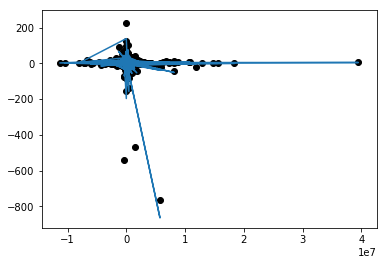

In [5]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(x1, y1)


# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x1, y1)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print(list(x1))
print(lr.coef_)
print(ransac.estimator_.coef_)


y1_pred = ransac.predict(x1)
print(metrics.r2_score(y1,y1_pred))


plt.plot(x1['0214-0514chng'], y1_pred)
plt.scatter(x1['0214-0514chng'],y1, color = "black")
plt.show()





In [6]:
y2 = X['0814price']-X['0214price']
x2 = pd.DataFrame()
x2['0214-0514pchng'] = X['0514price']- X['0214price']

x2['0214sp'] = sp['0214']
x2['0514sp'] = sp['0514']


x2

,0214-0514pchng,0214sp,0514sp
0,0.227288,1843.580005,1889.767142
1,0.156124,1843.580005,1889.767142
2,-33.783658,1843.580005,1889.767142
3,-4.589890,1843.580005,1889.767142
4,3.268842,1843.580005,1889.767142
5,0.671810,1843.580005,1889.767142
6,-4.074745,1843.580005,1889.767142
7,-2.058943,1843.580005,1889.767142
8,0.839661,1843.580005,1889.767142
9,-0.769937,1843.580005,1889.767142


0.447593863737


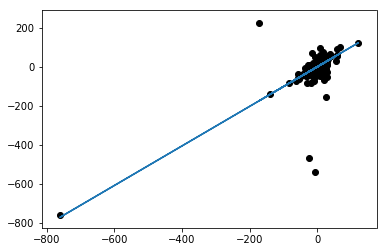

In [7]:

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x2, y2)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


y2_pred = ransac.predict(x2)
print(metrics.r2_score(y2,y2_pred))


plt.plot(x2['0214-0514pchng'], y2_pred)
plt.scatter(x2['0214-0514pchng'],y2, color = "black")
plt.show()


In [34]:
for j in range(1,5):
    n_components = j
    p1 = PCA(n_components = j, copy =True)
    p1.fit(x1)
    x3 =pd.DataFrame(p1.transform(x1), columns=['PCA%i' % i for i in range(n_components)], index=x1.index)



    ransac = linear_model.RANSACRegressor()
    ransac.fit(x3, y1)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)


    y3_pred = ransac.predict(x3)
    printf("With %k ")
    print(metrics.r2_score(y1,y3_pred))


0.00232756960319
0.448606712187
0.417247524224
0.449016256636
